<a href="https://colab.research.google.com/github/durvaakadam/Handwritten-Equation-Solver/blob/master/HANDWRITING_TRAIN_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive, files
import shutil

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Upload file from your computer
uploaded = files.upload()

# 3. Move uploaded file into Google Drive
for filename in uploaded.keys():
    shutil.move(filename, "/content/drive/MyDrive/" + filename)
    print(f"✅Uploaded {filename} to Google Drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving EQNEW.zip to EQNEW.zip
✅Uploaded EQNEW.zip to Google Drive


In [3]:
import zipfile
import os

# Path to the uploaded zip file in Google Drive
zip_path = "/content/drive/MyDrive/EQNEW.zip"

# Folder where you want to unzip
unzip_dir = "/content/drive/MyDrive/EQNEW_unzipped"

# Create the folder if it doesn't exist
os.makedirs(unzip_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

print(f"📂 Unzipped EQNEW.zip to {unzip_dir}")


📂 Unzipped EQNEW.zip to /content/drive/MyDrive/EQNEW_unzipped


In [7]:
import os

unzipped_dir = "/content/drive/MyDrive/EQNEW_unzipped"

total_files = sum(len(files) for _, _, files in os.walk(unzipped_dir))
total_folders = sum(len(dirs) for _, dirs, _ in os.walk(unzipped_dir))

print(f"📁 Total folders: {total_folders}")
print(f"📄 Total files: {total_files}")


📁 Total folders: 31
📄 Total files: 284212


In [9]:
import os

base_dir = "/content/drive/MyDrive/EQNEW_unzipped"

print(f"📦 Folder summary for: {base_dir}\n")

for folder_name in sorted(os.listdir(base_dir)):
    folder_path = os.path.join(base_dir, folder_name)
    if os.path.isdir(folder_path):
        # Count images (common formats)
        count = len([f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
        print(f"{folder_name}: {count} images")


📦 Folder summary for: /content/drive/MyDrive/EQNEW_unzipped

(: 14294 images
): 14355 images
+: 25112 images
,: 1906 images
-: 33997 images
0: 6914 images
1: 26520 images
2: 26141 images
3: 10909 images
4: 7396 images
5: 3545 images
6: 3118 images
7: 2909 images
8: 3068 images
9: 3737 images
=: 13104 images
A: 12367 images
X: 26594 images
b: 8651 images
cos: 2986 images
div: 868 images
forward_slash: 199 images
gt: 258 images
log: 2001 images
pi: 2332 images
sin: 4293 images
sqrt: 8908 images
sum: 2689 images
tan: 2450 images
times: 3251 images
y: 9340 images


In [ ]:
import zipfile
import os

zip_path = '/content/digi_op.zip'
extract_path = '/content/data'  # inside Colab's writable area

# Use /content/drive/MyDrive if needed, or just ./data
extract_path = './data'

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"✅ Extracted '{zip_path}' to '{extract_path}'")


✅ Extracted '/content/digi_op.zip' to './data'


In [ ]:
from google.colab import files
import zipfile
import os

# Make sure the target folder exists
data_path = '/content/data'
os.makedirs(data_path, exist_ok=True)

# Upload zip files manually
uploaded = files.upload()  # select your zip files (0.zip, minus.zip)


Saving -.zip to -.zip


In [ ]:
import zipfile
import os

data_path = '/content/data'
os.makedirs(data_path, exist_ok=True)  # make sure data folder exists

# List all zip files in the current runtime
zip_files = [f for f in os.listdir() if f.endswith('.zip')]
print("Zip files found:", zip_files)
for zf in zip_files:
    print(f"Extracting {zf} ...")
    with zipfile.ZipFile(zf, 'r') as zip_ref:
        zip_ref.extractall(data_path)

print("✅ All zip files extracted to", data_path)


Zip files found: ['-.zip']
Extracting -.zip ...
✅ All zip files extracted to /content/data


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip -q "/content/drive/MyDrive/digi_op.zip" -d "/content/data"

TRAINING


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [6]:
def binarize(img):
    img = image.img_to_array(img, dtype='uint8')
    binarized = np.expand_dims(cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2), -1)
    inverted_binary_img = ~binarized
    return inverted_binary_img

In [10]:
data_dir = 'data'
batch_size = 32
img_height = 45
img_width = 45

In [11]:
train_datagen = ImageDataGenerator(
    preprocessing_function=binarize)

In [12]:
train_generator = train_datagen.flow_from_directory(
        data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode="categorical",
        seed=123)

FileNotFoundError: [Errno 2] No such file or directory: 'data'

In [15]:
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [16]:
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array

def binarize(img):
    img = img_to_array(img, dtype='uint8')

    if img.ndim == 3 and img.shape[-1] == 3:
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    else:
        img = img.squeeze()

    binarized = cv2.adaptiveThreshold(
        img, 255,
        cv2.ADAPTIVE_THRESH_MEAN_C,
        cv2.THRESH_BINARY, 11, 2
    )

    inverted = cv2.bitwise_not(binarized)
    inverted = np.expand_dims(inverted, axis=-1)
    return inverted

data_dir = '/content/drive/MyDrive/EQNEW_unzipped'
batch_size = 32
img_height = 45
img_width = 45

train_datagen = ImageDataGenerator(
    preprocessing_function=binarize,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode="categorical",
    subset='training',
    seed=123
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode="categorical",
    subset='validation',
    seed=123
)


Found 227383 images belonging to 31 classes.
Found 56829 images belonging to 31 classes.


In [19]:
import os

data_dir = "/content/drive/MyDrive/EQNEW_unzipped"  # change to your dataset path
folders = sorted(os.listdir(data_dir))
print(len(folders))
for f in folders:
    print(f)


31
(
)
+
,
-
0
1
2
3
4
5
6
7
8
9
=
A
X
b
cos
div
forward_slash
gt
log
pi
sin
sqrt
sum
tan
times
y


In [17]:
# Class names
class_names = [k for k,v in train_generator.class_indices.items()]
class_names

['(',
 ')',
 '+',
 ',',
 '-',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '=',
 'A',
 'X',
 'b',
 'cos',
 'div',
 'forward_slash',
 'gt',
 'log',
 'pi',
 'sin',
 'sqrt',
 'sum',
 'tan',
 'times',
 'y']

In [20]:
import tensorflow as tf

num_classes = 31  # update to match your dataset

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(45, 45, 1)),
    tf.keras.layers.Rescaling(1./255),  # normalize pixel values
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),  # increased filters
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),  # added dropout for regularization
    tf.keras.layers.Dense(num_classes, activation='softmax')  # output layer
])

# Print model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 45, 45, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 43, 43, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 21, 21, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 19, 19, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 31)             │         3,999 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,255 (954.12 KB)

 Trainable params: 244,255 (954.12 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(
  optimizer='adam',
  loss=tf.losses.CategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [22]:
# If you used ImageDataGenerator.flow_from_directory
print("Class indices:", train_generator.class_indices)
print("Number of classes:", len(train_generator.class_indices))


Class indices: {'(': 0, ')': 1, '+': 2, ',': 3, '-': 4, '0': 5, '1': 6, '2': 7, '3': 8, '4': 9, '5': 10, '6': 11, '7': 12, '8': 13, '9': 14, '=': 15, 'A': 16, 'X': 17, 'b': 18, 'cos': 19, 'div': 20, 'forward_slash': 21, 'gt': 22, 'log': 23, 'pi': 24, 'sin': 25, 'sqrt': 26, 'sum': 27, 'tan': 28, 'times': 29, 'y': 30}
Number of classes: 31


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint(
    "/content/drive/MyDrive/best_model.h5",
    monitor='loss',
    save_best_only=True,
    verbose=1
)

early_stop = EarlyStopping(
    monitor='loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    train_generator,
    epochs=7,
    callbacks=[checkpoint, early_stop]
)


Epoch 1/7
 114/7106 ━━━━━━━━━━━━━━━━━━━━ 44:41 384ms/step - accuracy: 0.8550 - loss: 0.4816

In [ ]:
LOAD MODEL

In [ ]:
import tensorflow as tf

model_path = "/content/drive/MyDrive/EQUATION_model/my_model.h5"

# Load your model
model = tf.keras.models.load_model(model_path)

print("✅ Model loaded successfully from:", model_path)
model.summary()


✅ Model loaded successfully from: /content/drive/MyDrive/EQUATION_model/my_model.h5


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 45, 45, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 43, 43, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 21, 21, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 19, 19, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 9, 9, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 14)             │         1,806 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,616 (225.07 KB)

 Trainable params: 57,614 (225.05 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
from tensorflow.keras.models import load_model

model_path = '/content/drive/MyDrive/EQUATION_model/my_model.h5'

try:
    loaded_model = load_model(model_path)
    print("✅ Model loaded successfully! Here's the summary:")
    loaded_model.summary()
except Exception as e:
    print("❌ Failed to load model:", e)


✅ Model loaded successfully! Here's the summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 45, 45, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 43, 43, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 21, 21, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 19, 19, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 9, 9, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 14)             │         1,806 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,616 (225.07 KB)

 Trainable params: 57,614 (225.05 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# Save to Colab local runtime
local_path = '/content/my_model.h5'
model.save(local_path)
print("✅ Model saved locally at:", local_path)


✅ Model saved locally at: /content/my_model.h5


In [ ]:
# Evaluate on the training data
train_loss, train_acc = model.evaluate(train_generator, verbose=1)
print(f"✅ Training Accuracy: {train_acc*100:.2f}%")


/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/nn.py:675: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


4244/4244 ━━━━━━━━━━━━━━━━━━━━ 106s 25ms/step - accuracy: 0.9991 - loss: 0.0043
✅ Training Accuracy: 99.92%


In [ ]:
val_loss, val_acc = model.evaluate(val_generator, verbose=1)
print(f"✅ Validation Accuracy: {val_acc*100:.2f}%")


1061/1061 ━━━━━━━━━━━━━━━━━━━━ 26s 25ms/step - accuracy: 0.9991 - loss: 0.0034
✅ Validation Accuracy: 99.91%


In [ ]:
model.save('eqn-detect-model.keras')
print("✅ Model saved as eqn-detect-model.keras")


✅ Model saved as eqn-detect-model.keras


detection


In [ ]:
import shutil

# Source in Google Drive
dst_folder = "/content/drive/MyDrive/equation_images"

# Destination in Colab local
local_folder = "/content/equation_images"

# Copy back from Drive to local
shutil.copytree(dst_folder, local_folder, dirs_exist_ok=True)

print(f"✅ Copied from Drive to local: {local_folder}")


✅ Copied from Drive to local: /content/equation_images


In [ ]:
image_dir = "equation_images/"

In [ ]:
def getOverlap(a, b):
     return max(0, min(a[1], b[1]) - max(a[0], b[0]))
def detect_contours(img_path):
    # Given an image path, output bounding box coordinates of an image
    input_image = cv2.imread(img_path, 0) # Load a greyscale image

    # Make a copy to draw bounding box
    input_image_cpy = input_image.copy()

    # Convert the grayscale image to binary (image binarization opencv python), then invert
    binarized = cv2.adaptiveThreshold(input_image_cpy,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
    inverted_binary_img = ~binarized

    # Detect contours
    # hierarchy variable contains information about the relationship between each contours
    contours_list, hierarchy = cv2.findContours(inverted_binary_img,
                                           cv2.RETR_TREE,
                                           cv2.CHAIN_APPROX_SIMPLE) # Find contours
    # Detect contours
    l = []
    for c in contours_list:
        x, y, w, h = cv2.boundingRect(c)
        l.append([x, y, w, h])
    # Check whether any overlapping rectangles. We do this in a way such that we only compare each box once with all other boxes.
    lcopy = l.copy()
    keep = []
    while len(lcopy) != 0:
        curr_x, curr_y, curr_w, curr_h = lcopy.pop(0) # Look at next box
        if curr_w * curr_h < 20: # remove very small boxes
            continue
        throw = []
        for i, (x, y, w, h) in enumerate(lcopy):
            curr_interval = [curr_x, curr_x+curr_w]
            next_interval = [x, x+w]
            if getOverlap(curr_interval, next_interval) > 1 : # more than 3 pixels overlap, this is arbitrary
                # Merge the two intervals
                new_interval_x = [min(curr_x, x), max(curr_x+curr_w, x+w)]
                new_interval_y = [min(curr_y, y), max(curr_y+curr_h, y+h)]
                newx, neww = new_interval_x[0], new_interval_x[1] - new_interval_x[0]
                newy, newh = new_interval_y[0], new_interval_y[1] - new_interval_y[0]
                curr_x, curr_y, curr_w, curr_h = newx, newy, neww, newh
                throw.append(i) # Mark this box to throw away later, since it has now been merged with current box
        for ind in sorted(throw, reverse=True): # Sort in reverse order otherwise we will pop incorrectly
            lcopy.pop(ind)
        keep.append([curr_x, curr_y, curr_w, curr_h]) # Keep the current box we are comparing against
    return keep

In [ ]:
import cv2
IMAGE = "2numbers_040.png"
img_path = "equation_images/"+IMAGE
input_image = cv2.imread(img_path, 0)
input_image_cpy = input_image.copy()
keep = detect_contours(image_dir+IMAGE)

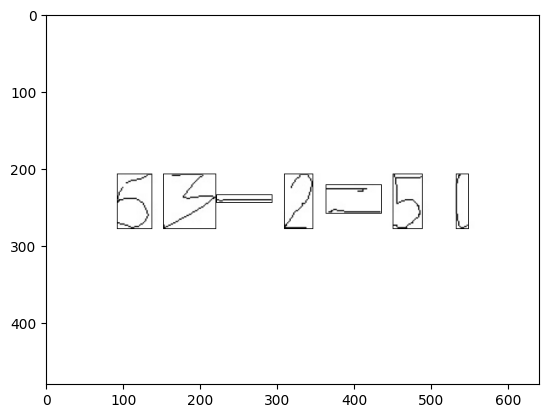

In [ ]:
import matplotlib.pyplot as plt
#Visualise how the bounding boxes look like
for (x, y, w, h) in keep:
    cv2.rectangle(input_image_cpy, (x, y), (x + w, y + h), (0, 0, 255), 1)
plt.imshow(input_image_cpy, cmap='gray')
plt.show()

# 3. Predict with model

In [ ]:
def resize_pad(img, size, padColor=255):

    h, w = img.shape[:2]
    sh, sw = size

    # interpolation method
    if h > sh or w > sw: # shrinking image
        interp = cv2.INTER_AREA
    else: # stretching image
        interp = cv2.INTER_CUBIC

    # aspect ratio of image
    aspect = w/h  # if on Python 2, you might need to cast as a float: float(w)/h

    # compute scaling and pad sizing
    if aspect > 1: # horizontal image
        new_w = sw
        new_h = np.round(new_w/aspect).astype(int)
        pad_vert = (sh-new_h)/2
        pad_top, pad_bot = np.floor(pad_vert).astype(int), np.ceil(pad_vert).astype(int)
        pad_left, pad_right = 0, 0
    elif aspect < 1: # vertical image
        new_h = sh
        new_w = np.round(new_h*aspect).astype(int)
        pad_horz = (sw-new_w)/2
        pad_left, pad_right = np.floor(pad_horz).astype(int), np.ceil(pad_horz).astype(int)
        pad_top, pad_bot = 0, 0
    else: # square image
        new_h, new_w = sh, sw
        pad_left, pad_right, pad_top, pad_bot = 0, 0, 0, 0

    # set pad color
    if len(img.shape) is 3 and not isinstance(padColor, (list, tuple, np.ndarray)): # color image but only one color provided
        padColor = [padColor]*3

    # scale and pad
    scaled_img = cv2.resize(img, (new_w, new_h), interpolation=interp)
    scaled_img = cv2.copyMakeBorder(scaled_img, pad_top, pad_bot, pad_left, pad_right, borderType=cv2.BORDER_CONSTANT, value=padColor)

    return scaled_img

<>:33: SyntaxWarning: "is" with 'int' literal. Did you mean "=="?
<>:33: SyntaxWarning: "is" with 'int' literal. Did you mean "=="?
/tmp/ipython-input-2429988426.py:33: SyntaxWarning: "is" with 'int' literal. Did you mean "=="?
  if len(img.shape) is 3 and not isinstance(padColor, (list, tuple, np.ndarray)): # color image but only one color provided


In [ ]:
import shutil

# Path in Drive
drive_path = "/content/drive/MyDrive/EQUATION_model/my_model.h5"

# Local path where you want to save
local_path = "/content/my_model.h5"

# Copy from Drive to local
shutil.copy(drive_path, local_path)

print(f"✅ Model copied from Drive ({drive_path}) to local ({local_path})")


✅ Model copied from Drive (/content/drive/MyDrive/EQUATION_model/my_model.h5) to local (/content/my_model.h5)


In [ ]:
import tensorflow as tf

# Load model
new_model = tf.keras.models.load_model('/content/my_model.h5')
print("✅ Model loaded successfully")


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/content/my_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

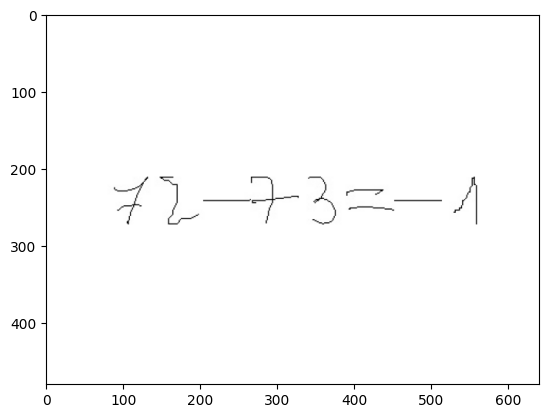

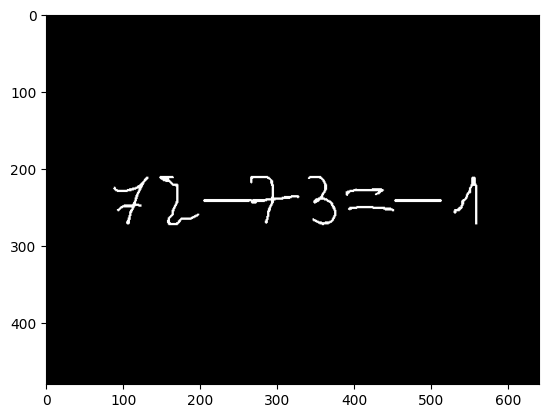

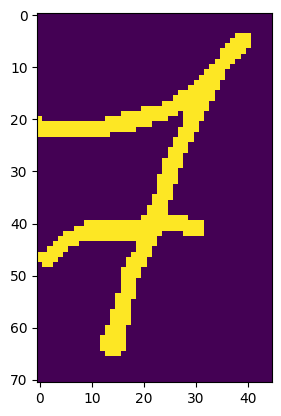

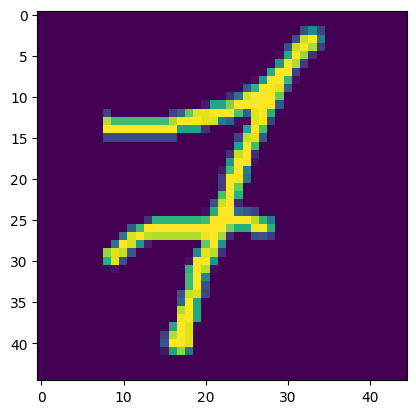

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


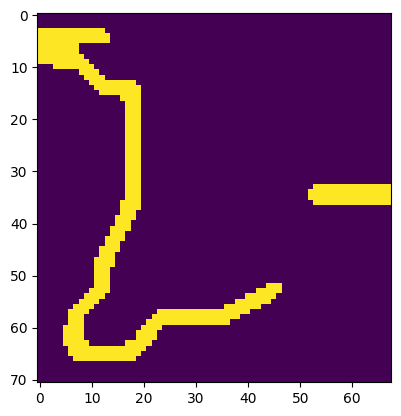

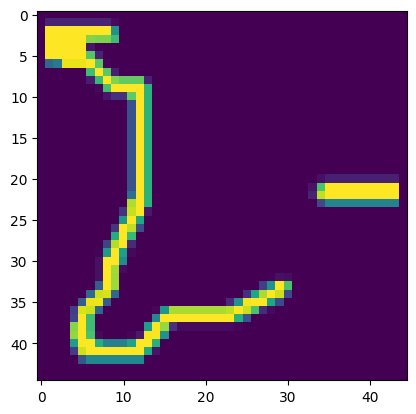

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


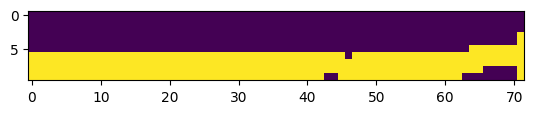

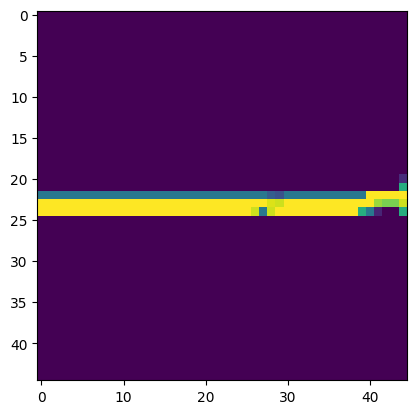

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


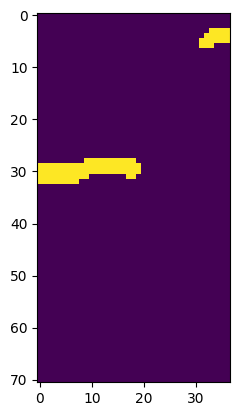

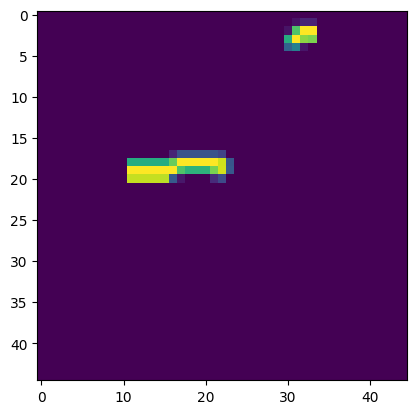

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


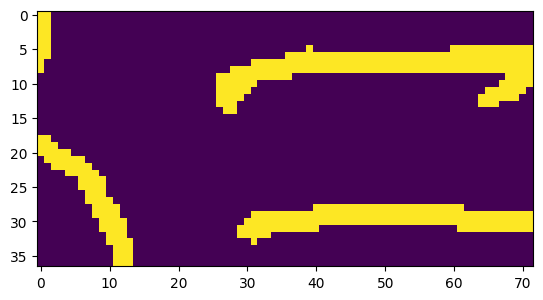

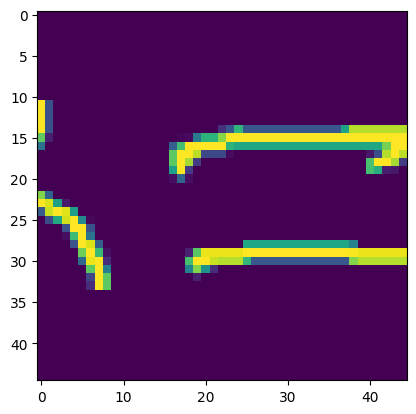

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


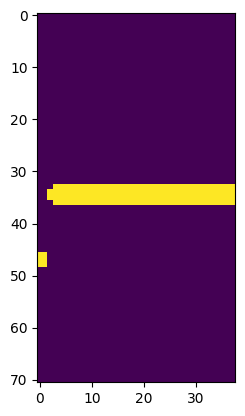

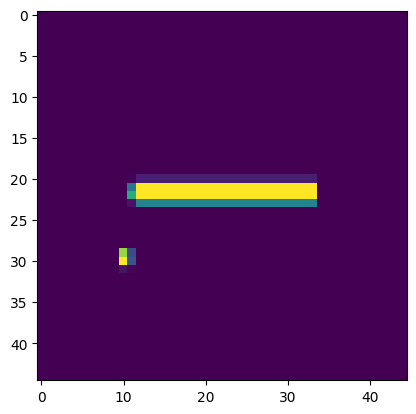

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


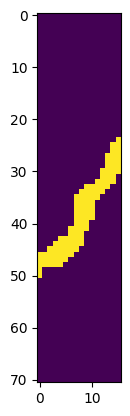

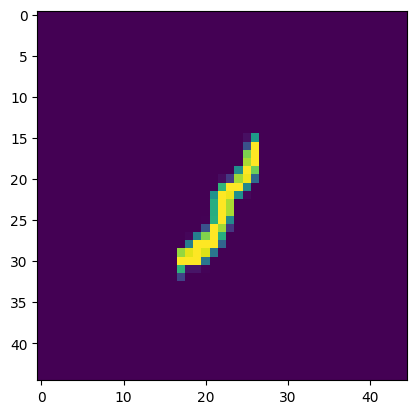

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
72--=-4


In [ ]:
eqn_list = []

# binarize the input image
IMAGE = "2numbers_049.png"
img_path = "equation_images/"+IMAGE
input_image = cv2.imread(img_path, 0)
inverted_binary_img = binarize(input_image)
plt.imshow(input_image, cmap='gray')
plt.show()
plt.imshow(inverted_binary_img, cmap='gray')
plt.show()

for (x, y, w, h) in sorted(keep, key = lambda x: x[0]):
    plt.imshow(inverted_binary_img[y:y+h, x:x+w])
    plt.show()
    img = resize_pad(inverted_binary_img[y:y+h, x:x+w], (45, 45), 0) # We must use the binarized image to predict
    plt.imshow(img)
    plt.show()
    pred_class = class_names[np.argmax(model.predict(tf.expand_dims(tf.expand_dims(img, 0), -1)))]
    if pred_class == "times":
        pred_class = "*"
    eqn_list.append(pred_class)
    #print(pred_class)
    #plt.imshow(img)
    #plt.show()
eqn = "".join(eqn_list)
print(eqn)

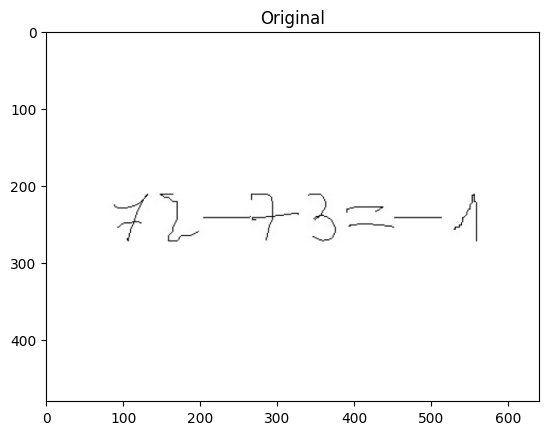

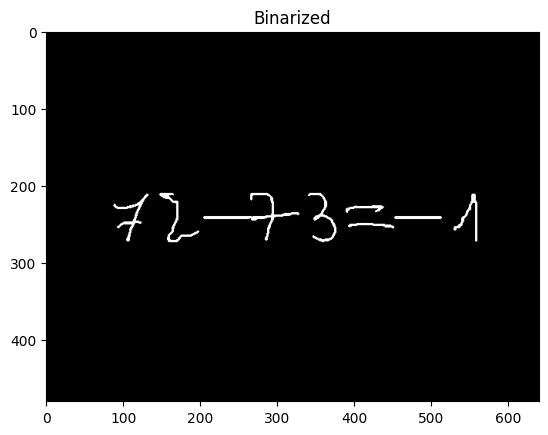

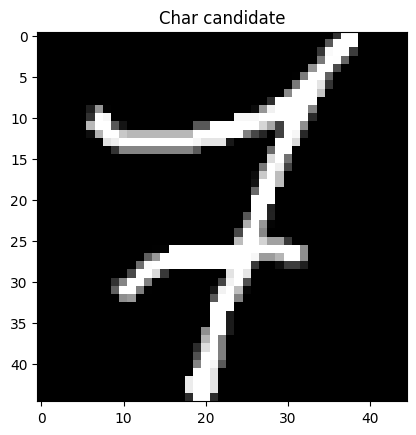

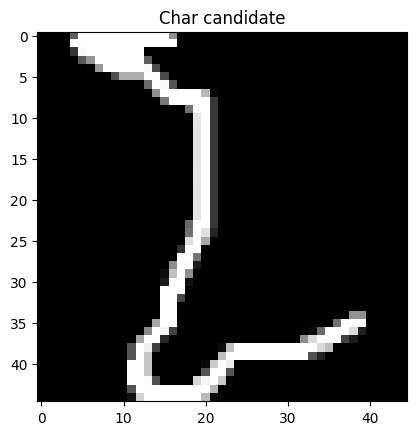

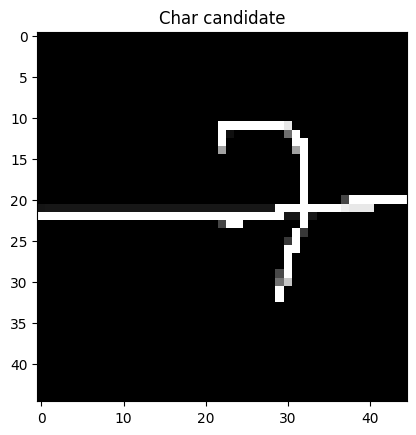

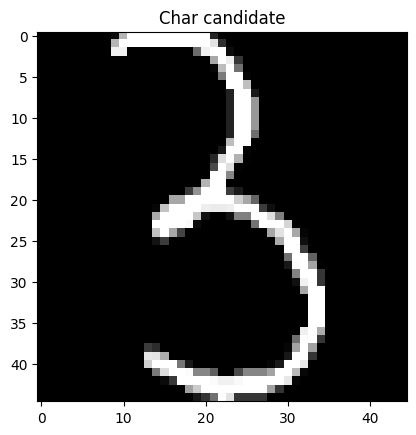

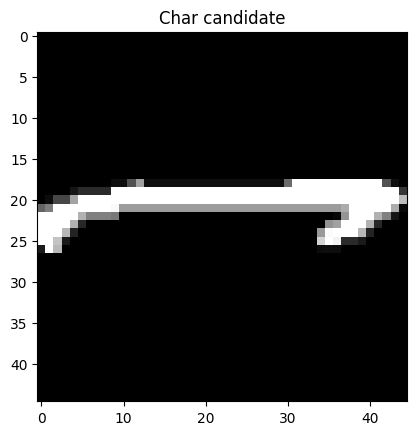

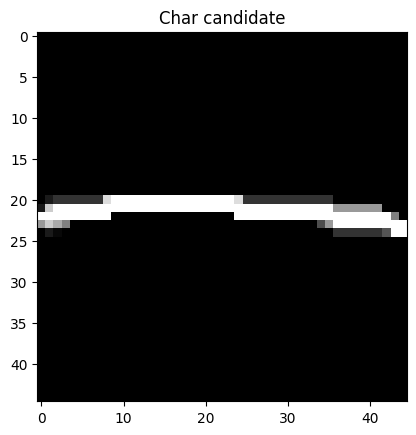

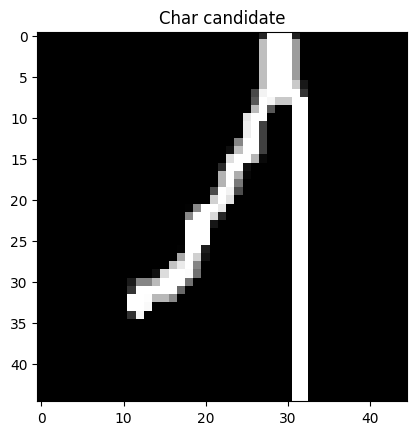

📝 Predicted Equation: 72+3--1


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# ✅ Binarize function
def binarize(img):
    """Convert image to binary (black & white) using Otsu's thresholding."""
    if len(img.shape) == 3:  # Convert to grayscale if needed
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(img, (5, 5), 0)
    _, binary_img = cv2.threshold(
        blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
    )
    return binary_img

# ✅ Resize and pad to (45x45)
def resize_pad(img, size=(45, 45), pad_value=0):
    h, w = img.shape
    scale = min(size[0] / h, size[1] / w)
    new_h, new_w = int(h * scale), int(w * scale)
    resized = cv2.resize(img, (new_w, new_h))

    result = np.full(size, pad_value, dtype=np.uint8)
    y_offset = (size[0] - new_h) // 2
    x_offset = (size[1] - new_w) // 2
    result[y_offset:y_offset+new_h, x_offset:x_offset+new_w] = resized
    return result

# ✅ Detect contours of characters
def detect_contours(img):
    """Return bounding boxes of each symbol in equation image."""
    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    keep = []
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        if w > 5 and h > 5:  # filter out noise
            keep.append((x, y, w, h))
    return keep

# ✅ Load model (as `model`)
model = tf.keras.models.load_model("/content/drive/MyDrive/EQUATION_model/my_model.h5")

# ✅ Define your class names (must match training order!)
class_names = ['+', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', 'times']

# --------- Main Code ---------
eqn_list = []

IMAGE = "2numbers_049.png"
img_path = "equation_images/" + IMAGE

# Read + binarize
input_image = cv2.imread(img_path, 0)
inverted_binary_img = binarize(input_image)

# Show original and binary
plt.imshow(input_image, cmap='gray')
plt.title("Original")
plt.show()

plt.imshow(inverted_binary_img, cmap='gray')
plt.title("Binarized")
plt.show()

# Detect contours
keep = detect_contours(inverted_binary_img)

# Sort left to right
for (x, y, w, h) in sorted(keep, key=lambda x: x[0]):
    roi = inverted_binary_img[y:y+h, x:x+w]
    img = resize_pad(roi, (45, 45), 0)

    plt.imshow(img, cmap="gray")
    plt.title("Char candidate")
    plt.show()

    # ✅ Predict using "model"
    pred = model.predict(tf.expand_dims(tf.expand_dims(img, 0), -1), verbose=0)
    pred_class = class_names[np.argmax(pred)]

    if pred_class == "times":
        pred_class = "*"
    eqn_list.append(pred_class)

# Build final equation string
eqn = "".join(eqn_list)
print("📝 Predicted Equation:", eqn)


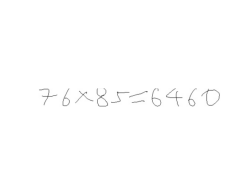

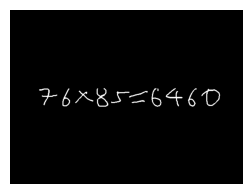

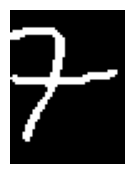

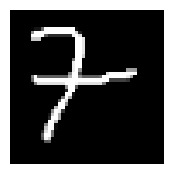

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


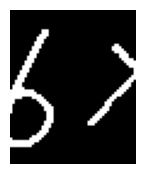

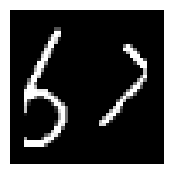

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


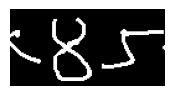

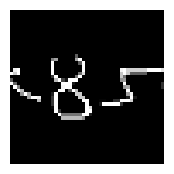

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


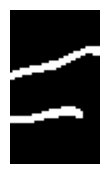

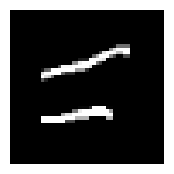

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


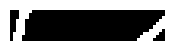

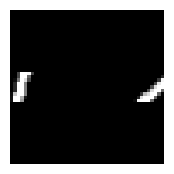

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


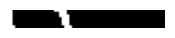

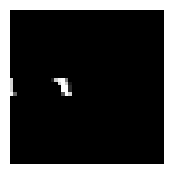

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


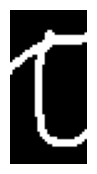

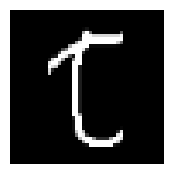

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Detected Equation: 74+=+-+


In [ ]:
eqn_list = []

# binarize the input image
IMAGE = "2numbers_001.png"
img_path = "equation_images/" + IMAGE
input_image = cv2.imread(img_path, 0)
inverted_binary_img = binarize(input_image)

# show original + binary smaller
plt.figure(figsize=(3,3))
plt.imshow(input_image, cmap='gray')
plt.axis("off")
plt.show()

plt.figure(figsize=(3,3))
plt.imshow(inverted_binary_img, cmap='gray')
plt.axis("off")
plt.show()

# loop through bounding boxes
for (x, y, w, h) in sorted(keep, key=lambda x: x[0]):
    # show cropped char small
    plt.figure(figsize=(2,2))
    plt.imshow(inverted_binary_img[y:y+h, x:x+w], cmap='gray')
    plt.axis("off")
    plt.show()

    # prepare input for model
    img = resize_pad(inverted_binary_img[y:y+h, x:x+w], (45, 45), 0)

    plt.figure(figsize=(2,2))
    plt.imshow(img, cmap='gray')
    plt.axis("off")
    plt.show()

    # prediction
    pred_class = class_names[np.argmax(
        model.predict(tf.expand_dims(tf.expand_dims(img, 0), -1))
    )]
    if pred_class == "times":
        pred_class = "*"
    eqn_list.append(pred_class)

# final equation
eqn = "".join(eqn_list)
print("Detected Equation:", eqn)


In [ ]:
from tensorflow.keras.models import load_model
model = load_model("my_model.h5")
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 45, 45, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 43, 43, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 21, 21, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 19, 19, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 9, 9, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 14)             │         1,806 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,616 (225.07 KB)

 Trainable params: 57,614 (225.05 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
import os

segment_folder = "equation_images/segments/"
segmented_images = [os.path.join(segment_folder, f) for f in sorted(os.listdir(segment_folder)) if f.endswith(".png")]

print(segmented_images)


FileNotFoundError: [Errno 2] No such file or directory: 'equation_images/segments/'

✅ Loaded model from: /content/drive/MyDrive/EQUATION_model/my_model.h5


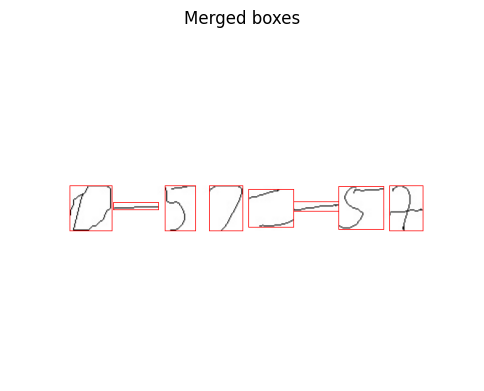

Total boxes (before filtering): 8
Boxes after area filter (min_area_thresh=80): 8


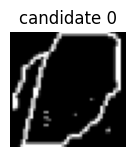

Orig top3: [('0', 0.17293760180473328), ('times', 0.0636201873421669), ('9', 0.0636201873421669)]
Inv  top3: [('8', 0.14986039698123932), ('+', 0.07557138800621033), ('4', 0.06454814970493317)]
Chosen (orig): 0 



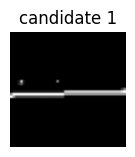

Orig top3: [('-', 0.17293459177017212), ('=', 0.06362127512693405), ('4', 0.06362052261829376)]
Inv  top3: [('+', 0.17291776835918427), ('8', 0.06362879276275635), ('4', 0.06362155824899673)]
Chosen (orig): - 



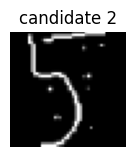

Orig top3: [('5', 0.17293760180473328), ('times', 0.0636201873421669), ('9', 0.0636201873421669)]
Inv  top3: [('+', 0.1319311410188675), ('8', 0.08716515451669693), ('4', 0.06512676179409027)]
Chosen (orig): 5 



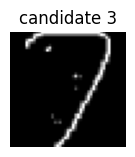

Orig top3: [('7', 0.17287452518939972), ('2', 0.06364908069372177), ('=', 0.06362302601337433)]
Inv  top3: [('+', 0.1369459182024002), ('8', 0.08287356048822403), ('4', 0.06564749777317047)]
Chosen (orig): 7 



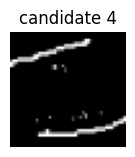

Orig top3: [('=', 0.17293274402618408), ('1', 0.06362240761518478), ('9', 0.06362040340900421)]
Inv  top3: [('8', 0.17293162643909454), ('+', 0.06362292170524597), ('=', 0.06362045556306839)]
Chosen (orig): = 



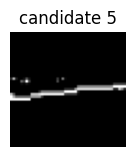

Orig top3: [('-', 0.1729365438222885), ('2', 0.06362041085958481), ('=', 0.06362038105726242)]
Inv  top3: [('+', 0.1729247123003006), ('8', 0.06362581998109818), ('4', 0.06362104415893555)]
Chosen (orig): - 



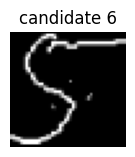

Orig top3: [('5', 0.17293760180473328), ('times', 0.0636201873421669), ('9', 0.0636201873421669)]
Inv  top3: [('8', 0.17293676733970642), ('+', 0.06362055987119675), ('=', 0.06362022459506989)]
Chosen (orig): 5 



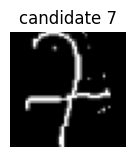

Orig top3: [('7', 0.17293760180473328), ('times', 0.0636201873421669), ('=', 0.0636201873421669)]
Inv  top3: [('8', 0.1729370802640915), ('+', 0.0636204183101654), ('4', 0.06362021714448929)]
Chosen (orig): 7 

🔎 Final predicted equation: 0-57=-57


In [ ]:
import os, cv2, numpy as np, matplotlib.pyplot as plt, tensorflow as tf

# --- helper funcs ---------------------------------------------------------
def getOverlap(a, b):
    return max(0, min(a[1], b[1]) - max(a[0], b[0]))

def detect_contours_merge(img_gray):
    """Adaptive threshold + invert + find contours + merge overlapping boxes (original notebook logic)."""
    binarized = cv2.adaptiveThreshold(img_gray, 255,
                                      cv2.ADAPTIVE_THRESH_MEAN_C,
                                      cv2.THRESH_BINARY, 11, 2)
    inverted = ~binarized
    contours, hierarchy = cv2.findContours(inverted, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    l = []
    for c in contours:
        x, y, w, h = cv2.boundingRect(c)
        l.append([x, y, w, h])
    # merge overlapping boxes (same idea as original notebook)
    lcopy = l.copy()
    keep = []
    while lcopy:
        curr_x, curr_y, curr_w, curr_h = lcopy.pop(0)
        if curr_w * curr_h < 20:  # tiny -> drop
            continue
        throw = []
        for i, (x, y, w, h) in enumerate(lcopy):
            curr_interval = [curr_x, curr_x + curr_w]
            next_interval = [x, x + w]
            if getOverlap(curr_interval, next_interval) > 1:
                # merge
                new_interval_x = [min(curr_x, x), max(curr_x + curr_w, x + w)]
                new_interval_y = [min(curr_y, y), max(curr_y + curr_h, y + h)]
                curr_x, curr_y = new_interval_x[0], new_interval_y[0]
                curr_w, curr_h = new_interval_x[1] - new_interval_x[0], new_interval_y[1] - new_interval_y[0]
                throw.append(i)
        for ind in sorted(throw, reverse=True):
            lcopy.pop(ind)
        keep.append([curr_x, curr_y, curr_w, curr_h])
    return inverted, keep

def resize_pad(img, size=(45,45), pad_value=0):
    h, w = img.shape[:2]
    sh, sw = size
    # choose interpolation
    interp = cv2.INTER_AREA if (h > sh or w > sw) else cv2.INTER_CUBIC
    aspect = w / h
    if aspect > 1:
        new_w = sw
        new_h = int(round(new_w / aspect))
        pad_top = (sh - new_h) // 2
        pad_bot = sh - new_h - pad_top
        pad_left = pad_right = 0
    elif aspect < 1:
        new_h = sh
        new_w = int(round(new_h * aspect))
        pad_left = (sw - new_w) // 2
        pad_right = sw - new_w - pad_left
        pad_top = pad_bot = 0
    else:
        new_h, new_w = sh, sw
        pad_left = pad_right = pad_top = pad_bot = 0
    scaled = cv2.resize(img, (new_w, new_h), interpolation=interp)
    result = np.full((sh, sw), pad_value, dtype=np.uint8)
    result[pad_top:pad_top+new_h, pad_left:pad_left+new_w] = scaled
    return result

# --- load model (try common paths) ----------------------------------------
model = None
tried_paths = [
    "/content/drive/MyDrive/EQUATION_model/my_model.h5",
    "/content/my_model.h5",
    "/content/drive/MyDrive/EQUATION_model/eqn-detect-model",
    "/content/eqn-detect-model"
]
for p in tried_paths:
    try:
        model = tf.keras.models.load_model(p)
        print("✅ Loaded model from:", p)
        break
    except Exception as e:
        pass
if model is None:
    raise FileNotFoundError(f"Model not found. Tried: {tried_paths}")

# Make sure class_names is the training order you found earlier:
class_names = ['+', '-', '0','1','2','3','4','5','6','7','8','9','=','times']

# --- run detection + debug -------------------------------------------------
IMAGE = "2numbers_010.png"                    # change if needed
img_path = os.path.join("equation_images", IMAGE)
if not os.path.exists(img_path):
    raise FileNotFoundError("Equation image not found at: " + img_path)

img_gray = cv2.imread(img_path, 0)
inverted, boxes = detect_contours_merge(img_gray)

# visualize merged boxes
img_vis = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)
for (x,y,w,h) in boxes:
    cv2.rectangle(img_vis, (x,y), (x+w, y+h), (0,0,255), 1)
plt.figure(figsize=(6,6)); plt.imshow(img_vis[:,:,::-1]); plt.title("Merged boxes"); plt.axis('off'); plt.show()
print("Total boxes (before filtering):", len(boxes))

# filter tiny / noise boxes (you can tune these thresholds)
areas = [w*h for x,y,w,h in boxes] if boxes else [0]
median_area = np.median(areas) if areas else 0
min_area_thresh = max(80, median_area * 0.02)   # tweak if too strict/loose
filtered = [b for b in boxes if (b[2]*b[3]) >= min_area_thresh]
print("Boxes after area filter (min_area_thresh={}):".format(int(min_area_thresh)), len(filtered))

# sort left->right
filtered = sorted(filtered, key=lambda b: b[0])

eqn_list = []
for i, (x,y,w,h) in enumerate(filtered):
    roi = inverted[y:y+h, x:x+w]           # cropped candidate (note: inverted is from adaptive thresh + invert)
    proc = resize_pad(roi, (45,45), pad_value=0)
    plt.figure(figsize=(1.5,1.5)); plt.imshow(proc, cmap='gray'); plt.title(f"candidate {i}"); plt.axis('off'); plt.show()

    # predict on proc (model outputs logits -> turn to probs)
    inp = tf.expand_dims(tf.expand_dims(proc, 0), -1)   # shape (1,45,45,1)
    logits = model.predict(inp, verbose=0)
    probs = tf.nn.softmax(logits[0]).numpy()
    top_idx = probs.argmax()
    top3 = probs.argsort()[-3:][::-1]
    print("Orig top3:", [(class_names[idx], float(probs[idx])) for idx in top3])

    # also try inverted candidate (255 - proc) to auto-check inversion
    proc_inv = 255 - proc
    inp2 = tf.expand_dims(tf.expand_dims(proc_inv, 0), -1)
    logits2 = model.predict(inp2, verbose=0)
    probs2 = tf.nn.softmax(logits2[0]).numpy()
    top_idx2 = probs2.argmax()
    top3_inv = probs2.argsort()[-3:][::-1]
    print("Inv  top3:", [(class_names[idx], float(probs2[idx])) for idx in top3_inv])

    # Choose the prediction with higher max confidence (add a small tolerance)
    if probs2[top_idx2] > probs[top_idx] + 0.08:
        chosen = class_names[top_idx2]; source = "inv"
    else:
        chosen = class_names[top_idx]; source = "orig"
    print(f"Chosen ({source}):", chosen, "\n")
    chosen = "*" if chosen == "times" else chosen
    eqn_list.append(chosen)

final_eq = "".join(eqn_list)
print("🔎 Final predicted equation:", final_eq)

✅ Loaded model from: /content/drive/MyDrive/EQUATION_model/my_model.h5


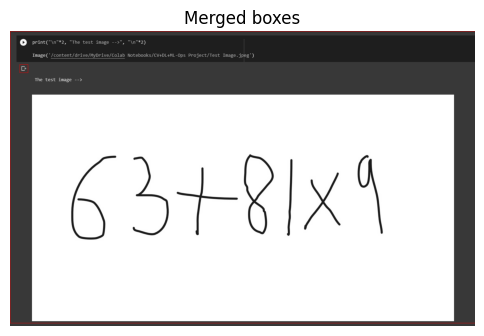

Total boxes (before filtering): 2
Boxes after area filter (min_area_thresh=11487): 1


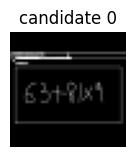

Orig top3: [('=', 0.1725490689277649), ('1', 0.06375526636838913), ('2', 0.06367988139390945)]
Inv  top3: [('8', 0.12354929745197296), ('+', 0.09362190216779709), ('4', 0.06524136662483215)]
Chosen (orig): = 

🔎 Final predicted equation: =


In [ ]:
import os, cv2, numpy as np, matplotlib.pyplot as plt, tensorflow as tf

# --- helper funcs ---------------------------------------------------------
def getOverlap(a, b):
    return max(0, min(a[1], b[1]) - max(a[0], b[0]))

def detect_contours_merge(img_gray):
    """Adaptive threshold + invert + find contours + merge overlapping boxes (original notebook logic)."""
    binarized = cv2.adaptiveThreshold(img_gray, 255,
                                      cv2.ADAPTIVE_THRESH_MEAN_C,
                                      cv2.THRESH_BINARY, 11, 2)
    inverted = ~binarized
    contours, hierarchy = cv2.findContours(inverted, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    l = []
    for c in contours:
        x, y, w, h = cv2.boundingRect(c)
        l.append([x, y, w, h])
    # merge overlapping boxes (same idea as original notebook)
    lcopy = l.copy()
    keep = []
    while lcopy:
        curr_x, curr_y, curr_w, curr_h = lcopy.pop(0)
        if curr_w * curr_h < 20:  # tiny -> drop
            continue
        throw = []
        for i, (x, y, w, h) in enumerate(lcopy):
            curr_interval = [curr_x, curr_x + curr_w]
            next_interval = [x, x + w]
            if getOverlap(curr_interval, next_interval) > 1:
                # merge
                new_interval_x = [min(curr_x, x), max(curr_x + curr_w, x + w)]
                new_interval_y = [min(curr_y, y), max(curr_y + curr_h, y + h)]
                curr_x, curr_y = new_interval_x[0], new_interval_y[0]
                curr_w, curr_h = new_interval_x[1] - new_interval_x[0], new_interval_y[1] - new_interval_y[0]
                throw.append(i)
        for ind in sorted(throw, reverse=True):
            lcopy.pop(ind)
        keep.append([curr_x, curr_y, curr_w, curr_h])
    return inverted, keep

def resize_pad(img, size=(45,45), pad_value=0):
    h, w = img.shape[:2]
    sh, sw = size
    # choose interpolation
    interp = cv2.INTER_AREA if (h > sh or w > sw) else cv2.INTER_CUBIC
    aspect = w / h
    if aspect > 1:
        new_w = sw
        new_h = int(round(new_w / aspect))
        pad_top = (sh - new_h) // 2
        pad_bot = sh - new_h - pad_top
        pad_left = pad_right = 0
    elif aspect < 1:
        new_h = sh
        new_w = int(round(new_h * aspect))
        pad_left = (sw - new_w) // 2
        pad_right = sw - new_w - pad_left
        pad_top = pad_bot = 0
    else:
        new_h, new_w = sh, sw
        pad_left = pad_right = pad_top = pad_bot = 0
    scaled = cv2.resize(img, (new_w, new_h), interpolation=interp)
    result = np.full((sh, sw), pad_value, dtype=np.uint8)
    result[pad_top:pad_top+new_h, pad_left:pad_left+new_w] = scaled
    return result

# --- load model (try common paths) ----------------------------------------
model = None
tried_paths = [
    "/content/drive/MyDrive/EQUATION_model/my_model.h5",
    "/content/my_model.h5",
    "/content/drive/MyDrive/EQUATION_model/eqn-detect-model",
    "/content/eqn-detect-model"
]
for p in tried_paths:
    try:
        model = tf.keras.models.load_model(p)
        print("✅ Loaded model from:", p)
        break
    except Exception as e:
        pass
if model is None:
    raise FileNotFoundError(f"Model not found. Tried: {tried_paths}")

# Make sure class_names is the training order you found earlier:
class_names = ['+', '-', '0','1','2','3','4','5','6','7','8','9','=','times']

# --- run detection + debug -------------------------------------------------
IMAGE = "/content/equation1.png"                    # change if needed
img_path = os.path.join("equation_images", IMAGE)
if not os.path.exists(img_path):
    raise FileNotFoundError("Equation image not found at: " + img_path)

img_gray = cv2.imread(img_path, 0)
inverted, boxes = detect_contours_merge(img_gray)

# visualize merged boxes
img_vis = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)
for (x,y,w,h) in boxes:
    cv2.rectangle(img_vis, (x,y), (x+w, y+h), (0,0,255), 1)
plt.figure(figsize=(6,6)); plt.imshow(img_vis[:,:,::-1]); plt.title("Merged boxes"); plt.axis('off'); plt.show()
print("Total boxes (before filtering):", len(boxes))

# filter tiny / noise boxes (you can tune these thresholds)
areas = [w*h for x,y,w,h in boxes] if boxes else [0]
median_area = np.median(areas) if areas else 0
min_area_thresh = max(80, median_area * 0.02)   # tweak if too strict/loose
filtered = [b for b in boxes if (b[2]*b[3]) >= min_area_thresh]
print("Boxes after area filter (min_area_thresh={}):".format(int(min_area_thresh)), len(filtered))

# sort left->right
filtered = sorted(filtered, key=lambda b: b[0])

eqn_list = []
for i, (x,y,w,h) in enumerate(filtered):
    roi = inverted[y:y+h, x:x+w]           # cropped candidate (note: inverted is from adaptive thresh + invert)
    proc = resize_pad(roi, (45,45), pad_value=0)
    plt.figure(figsize=(1.5,1.5)); plt.imshow(proc, cmap='gray'); plt.title(f"candidate {i}"); plt.axis('off'); plt.show()

    # predict on proc (model outputs logits -> turn to probs)
    inp = tf.expand_dims(tf.expand_dims(proc, 0), -1)   # shape (1,45,45,1)
    logits = model.predict(inp, verbose=0)
    probs = tf.nn.softmax(logits[0]).numpy()
    top_idx = probs.argmax()
    top3 = probs.argsort()[-3:][::-1]
    print("Orig top3:", [(class_names[idx], float(probs[idx])) for idx in top3])

    # also try inverted candidate (255 - proc) to auto-check inversion
    proc_inv = 255 - proc
    inp2 = tf.expand_dims(tf.expand_dims(proc_inv, 0), -1)
    logits2 = model.predict(inp2, verbose=0)
    probs2 = tf.nn.softmax(logits2[0]).numpy()
    top_idx2 = probs2.argmax()
    top3_inv = probs2.argsort()[-3:][::-1]
    print("Inv  top3:", [(class_names[idx], float(probs2[idx])) for idx in top3_inv])

    # Choose the prediction with higher max confidence (add a small tolerance)
    if probs2[top_idx2] > probs[top_idx] + 0.08:
        chosen = class_names[top_idx2]; source = "inv"
    else:
        chosen = class_names[top_idx]; source = "orig"
    print(f"Chosen ({source}):", chosen, "\n")
    chosen = "*" if chosen == "times" else chosen
    eqn_list.append(chosen)

final_eq = "".join(eqn_list)
print("🔎 Final predicted equation:", final_eq)

✅ Loaded model from: /content/drive/MyDrive/EQUATION_model/my_model.h5


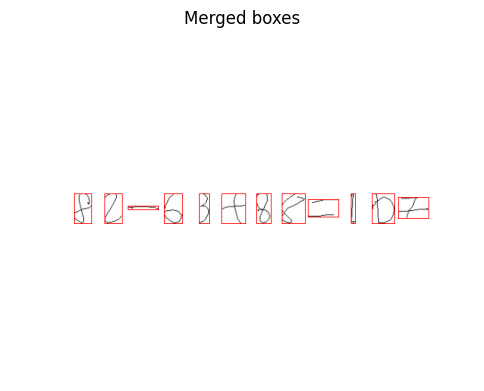

Total boxes (before filtering): 12
Boxes after area filter (min_area_thresh=80): 12


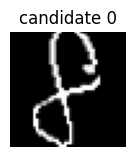

Orig top3: [('8', 0.1729375720024109), ('+', 0.0636201947927475), ('=', 0.0636201873421669)]
Inv  top3: [('+', 0.17150567471981049), ('8', 0.06413649767637253), ('4', 0.06382815539836884)]
Chosen (orig): 8 



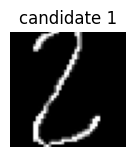

Orig top3: [('2', 0.17293760180473328), ('times', 0.0636201873421669), ('9', 0.0636201873421669)]
Inv  top3: [('8', 0.1729375720024109), ('+', 0.0636201947927475), ('=', 0.0636201873421669)]
Chosen (orig): 2 



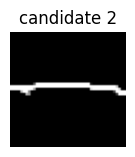

Orig top3: [('-', 0.1729375422000885), ('=', 0.06362021714448929), ('9', 0.0636201873421669)]
Inv  top3: [('+', 0.17293760180473328), ('times', 0.0636201873421669), ('9', 0.0636201873421669)]
Chosen (orig): - 



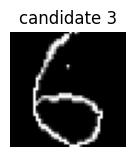

Orig top3: [('6', 0.17293760180473328), ('times', 0.0636201873421669), ('=', 0.0636201873421669)]
Inv  top3: [('+', 0.1501460075378418), ('8', 0.07540278881788254), ('4', 0.06453981250524521)]
Chosen (orig): 6 



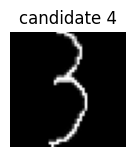

Orig top3: [('3', 0.17293760180473328), ('times', 0.0636201873421669), ('9', 0.0636201873421669)]
Inv  top3: [('8', 0.172928586602211), ('+', 0.06362398713827133), ('4', 0.06362093240022659)]
Chosen (orig): 3 



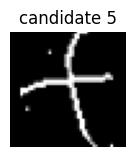

Orig top3: [('+', 0.17293760180473328), ('times', 0.0636201873421669), ('9', 0.0636201873421669)]
Inv  top3: [('+', 0.17291323840618134), ('8', 0.06363131105899811), ('4', 0.06362130492925644)]
Chosen (orig): + 



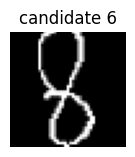

Orig top3: [('8', 0.1449928730726242), ('4', 0.07803202420473099), ('2', 0.06511447578668594)]
Inv  top3: [('+', 0.14434489607810974), ('8', 0.0789029449224472), ('4', 0.06472963094711304)]
Chosen (orig): 8 



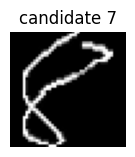

Orig top3: [('8', 0.17184025049209595), ('2', 0.06412538886070251), ('0', 0.06366986036300659)]
Inv  top3: [('8', 0.17285828292369843), ('+', 0.0636565238237381), ('=', 0.06362375617027283)]
Chosen (orig): 8 



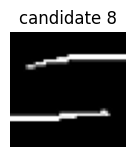

Orig top3: [('=', 0.17293760180473328), ('times', 0.0636201873421669), ('9', 0.0636201873421669)]
Inv  top3: [('8', 0.1417437642812729), ('+', 0.08041251450777054), ('4', 0.06492454558610916)]
Chosen (orig): = 



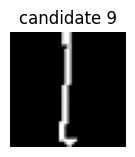

Orig top3: [('1', 0.17292992770671844), ('2', 0.06362251192331314), ('+', 0.0636213943362236)]
Inv  top3: [('8', 0.17293177545070648), ('+', 0.06362257897853851), ('4', 0.06362072378396988)]
Chosen (orig): 1 



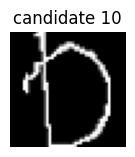

Orig top3: [('0', 0.1729375422000885), ('5', 0.06362020969390869), ('9', 0.0636201873421669)]
Inv  top3: [('8', 0.1729365736246109), ('+', 0.06362064927816391), ('2', 0.06362024694681168)]
Chosen (orig): 0 



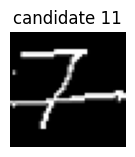

Orig top3: [('7', 0.17293760180473328), ('times', 0.0636201873421669), ('=', 0.0636201873421669)]
Inv  top3: [('8', 0.17293722927570343), ('2', 0.06362034380435944), ('=', 0.0636201947927475)]
Chosen (orig): 7 

🔎 Final predicted equation: 82-63+88=107


In [ ]:
import os, cv2, numpy as np, matplotlib.pyplot as plt, tensorflow as tf

# --- helper funcs ---------------------------------------------------------
def getOverlap(a, b):
    return max(0, min(a[1], b[1]) - max(a[0], b[0]))

def detect_contours_merge(img_gray):
    """Adaptive threshold + invert + find contours + merge overlapping boxes (original notebook logic)."""
    binarized = cv2.adaptiveThreshold(img_gray, 255,
                                      cv2.ADAPTIVE_THRESH_MEAN_C,
                                      cv2.THRESH_BINARY, 11, 2)
    inverted = ~binarized
    contours, hierarchy = cv2.findContours(inverted, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    l = []
    for c in contours:
        x, y, w, h = cv2.boundingRect(c)
        l.append([x, y, w, h])
    # merge overlapping boxes (same idea as original notebook)
    lcopy = l.copy()
    keep = []
    while lcopy:
        curr_x, curr_y, curr_w, curr_h = lcopy.pop(0)
        if curr_w * curr_h < 20:  # tiny -> drop
            continue
        throw = []
        for i, (x, y, w, h) in enumerate(lcopy):
            curr_interval = [curr_x, curr_x + curr_w]
            next_interval = [x, x + w]
            if getOverlap(curr_interval, next_interval) > 1:
                # merge
                new_interval_x = [min(curr_x, x), max(curr_x + curr_w, x + w)]
                new_interval_y = [min(curr_y, y), max(curr_y + curr_h, y + h)]
                curr_x, curr_y = new_interval_x[0], new_interval_y[0]
                curr_w, curr_h = new_interval_x[1] - new_interval_x[0], new_interval_y[1] - new_interval_y[0]
                throw.append(i)
        for ind in sorted(throw, reverse=True):
            lcopy.pop(ind)
        keep.append([curr_x, curr_y, curr_w, curr_h])
    return inverted, keep

def resize_pad(img, size=(45,45), pad_value=0):
    h, w = img.shape[:2]
    sh, sw = size
    # choose interpolation
    interp = cv2.INTER_AREA if (h > sh or w > sw) else cv2.INTER_CUBIC
    aspect = w / h
    if aspect > 1:
        new_w = sw
        new_h = int(round(new_w / aspect))
        pad_top = (sh - new_h) // 2
        pad_bot = sh - new_h - pad_top
        pad_left = pad_right = 0
    elif aspect < 1:
        new_h = sh
        new_w = int(round(new_h * aspect))
        pad_left = (sw - new_w) // 2
        pad_right = sw - new_w - pad_left
        pad_top = pad_bot = 0
    else:
        new_h, new_w = sh, sw
        pad_left = pad_right = pad_top = pad_bot = 0
    scaled = cv2.resize(img, (new_w, new_h), interpolation=interp)
    result = np.full((sh, sw), pad_value, dtype=np.uint8)
    result[pad_top:pad_top+new_h, pad_left:pad_left+new_w] = scaled
    return result

# --- load model (try common paths) ----------------------------------------
model = None
tried_paths = [
    "/content/drive/MyDrive/EQUATION_model/my_model.h5",
    "/content/my_model.h5",
    "/content/drive/MyDrive/EQUATION_model/eqn-detect-model",
    "/content/eqn-detect-model"
]
for p in tried_paths:
    try:
        model = tf.keras.models.load_model(p)
        print("✅ Loaded model from:", p)
        break
    except Exception as e:
        pass
if model is None:
    raise FileNotFoundError(f"Model not found. Tried: {tried_paths}")

# Make sure class_names is the training order you found earlier:
class_names = ['+', '-', '0','1','2','3','4','5','6','7','8','9','=','times']

# --- run detection + debug -------------------------------------------------
IMAGE = "/content/equation_images/3numbers_030.png"                    # change if needed
img_path = os.path.join("equation_images", IMAGE)
if not os.path.exists(img_path):
    raise FileNotFoundError("Equation image not found at: " + img_path)

img_gray = cv2.imread(img_path, 0)
inverted, boxes = detect_contours_merge(img_gray)

# visualize merged boxes
img_vis = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)
for (x,y,w,h) in boxes:
    cv2.rectangle(img_vis, (x,y), (x+w, y+h), (0,0,255), 1)
plt.figure(figsize=(6,6)); plt.imshow(img_vis[:,:,::-1]); plt.title("Merged boxes"); plt.axis('off'); plt.show()
print("Total boxes (before filtering):", len(boxes))

# filter tiny / noise boxes (you can tune these thresholds)
areas = [w*h for x,y,w,h in boxes] if boxes else [0]
median_area = np.median(areas) if areas else 0
min_area_thresh = max(80, median_area * 0.02)   # tweak if too strict/loose
filtered = [b for b in boxes if (b[2]*b[3]) >= min_area_thresh]
print("Boxes after area filter (min_area_thresh={}):".format(int(min_area_thresh)), len(filtered))

# sort left->right
filtered = sorted(filtered, key=lambda b: b[0])

eqn_list = []
for i, (x,y,w,h) in enumerate(filtered):
    roi = inverted[y:y+h, x:x+w]           # cropped candidate (note: inverted is from adaptive thresh + invert)
    proc = resize_pad(roi, (45,45), pad_value=0)
    plt.figure(figsize=(1.5,1.5)); plt.imshow(proc, cmap='gray'); plt.title(f"candidate {i}"); plt.axis('off'); plt.show()

    # predict on proc (model outputs logits -> turn to probs)
    inp = tf.expand_dims(tf.expand_dims(proc, 0), -1)   # shape (1,45,45,1)
    logits = model.predict(inp, verbose=0)
    probs = tf.nn.softmax(logits[0]).numpy()
    top_idx = probs.argmax()
    top3 = probs.argsort()[-3:][::-1]
    print("Orig top3:", [(class_names[idx], float(probs[idx])) for idx in top3])

    # also try inverted candidate (255 - proc) to auto-check inversion
    proc_inv = 255 - proc
    inp2 = tf.expand_dims(tf.expand_dims(proc_inv, 0), -1)
    logits2 = model.predict(inp2, verbose=0)
    probs2 = tf.nn.softmax(logits2[0]).numpy()
    top_idx2 = probs2.argmax()
    top3_inv = probs2.argsort()[-3:][::-1]
    print("Inv  top3:", [(class_names[idx], float(probs2[idx])) for idx in top3_inv])

    # Choose the prediction with higher max confidence (add a small tolerance)
    if probs2[top_idx2] > probs[top_idx] + 0.08:
        chosen = class_names[top_idx2]; source = "inv"
    else:
        chosen = class_names[top_idx]; source = "orig"
    print(f"Chosen ({source}):", chosen, "\n")
    chosen = "*" if chosen == "times" else chosen
    eqn_list.append(chosen)

final_eq = "".join(eqn_list)
print("🔎 Final predicted equation:", final_eq)

In [ ]:
from google.colab import files

# Replace with your model path
files.download('/content/drive/MyDrive/EQUATION_model/my_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(model.input_shape)


(None, 45, 45, 1)


✅ Loaded model from: /content/drive/MyDrive/EQUATION_model/my_model.h5


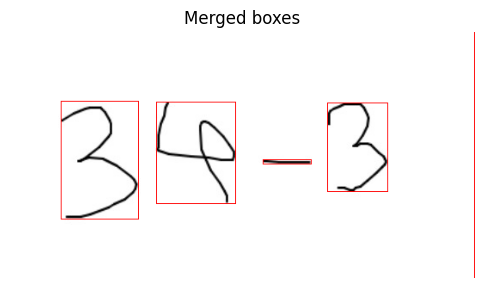

Total boxes (before filtering): 5
Boxes after filter (min_area_thresh=144): 4


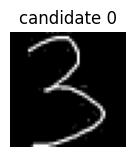

Orig top3: [('3', 0.17293760180473328), ('times', 0.0636201873421669), ('9', 0.0636201873421669)]
Inv  top3: [('8', 0.17293232679367065), ('+', 0.06362258642911911), ('4', 0.063620425760746)]
Chosen (orig): 3 



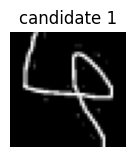

Orig top3: [('4', 0.17293760180473328), ('times', 0.0636201873421669), ('9', 0.0636201873421669)]
Inv  top3: [('8', 0.17281100153923035), ('+', 0.0636761263012886), ('4', 0.06362801045179367)]
Chosen (orig): 4 



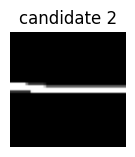

Orig top3: [('-', 0.17279981076717377), ('4', 0.06367038190364838), ('=', 0.06363905966281891)]
Inv  top3: [('+', 0.1729360967874527), ('4', 0.06362087279558182), ('9', 0.06362025439739227)]
Chosen (orig): - 



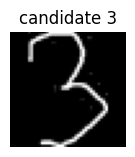

Orig top3: [('3', 0.17293760180473328), ('times', 0.0636201873421669), ('9', 0.0636201873421669)]
Inv  top3: [('8', 0.17293748259544373), ('+', 0.06362022459506989), ('=', 0.0636201947927475)]
Chosen (orig): 3 

🔎 Final predicted equation: 34-3
✅ Solved: 34-3 = 31


In [ ]:
import os, cv2, numpy as np, matplotlib.pyplot as plt, tensorflow as tf
import re
# --- helper funcs ---------------------------------------------------------
def getOverlap(a, b):
    return max(0, min(a[1], b[1]) - max(a[0], b[0]))

def detect_contours_merge(img_gray):
    """Adaptive threshold + invert + find contours + merge overlapping boxes (original notebook logic)."""
    binarized = cv2.adaptiveThreshold(img_gray, 255,
                                      cv2.ADAPTIVE_THRESH_MEAN_C,
                                      cv2.THRESH_BINARY, 11, 2)
    inverted = ~binarized
    contours, _ = cv2.findContours(inverted, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    l = []
    for c in contours:
        x, y, w, h = cv2.boundingRect(c)
        l.append([x, y, w, h])
    # merge overlapping boxes
    lcopy = l.copy()
    keep = []
    while lcopy:
        curr_x, curr_y, curr_w, curr_h = lcopy.pop(0)
        if curr_w * curr_h < 20:  # tiny -> drop
            continue
        throw = []
        for i, (x, y, w, h) in enumerate(lcopy):
            curr_interval = [curr_x, curr_x + curr_w]
            next_interval = [x, x + w]
            if getOverlap(curr_interval, next_interval) > 1:
                # merge
                new_interval_x = [min(curr_x, x), max(curr_x + curr_w, x + w)]
                new_interval_y = [min(curr_y, y), max(curr_y + curr_h, y + h)]
                curr_x, curr_y = new_interval_x[0], new_interval_y[0]
                curr_w, curr_h = new_interval_x[1] - new_interval_x[0], new_interval_y[1] - new_interval_y[0]
                throw.append(i)
        for ind in sorted(throw, reverse=True):
            lcopy.pop(ind)
        keep.append([curr_x, curr_y, curr_w, curr_h])
    return inverted, keep

def resize_pad(img, size=(45,45), pad_value=0):
    h, w = img.shape[:2]
    if h == 0 or w == 0:
        return None
    sh, sw = size
    interp = cv2.INTER_AREA if (h > sh or w > sw) else cv2.INTER_CUBIC
    aspect = w / h
    if aspect > 1:
        new_w = sw
        new_h = int(round(new_w / aspect))
        pad_top = (sh - new_h) // 2
        pad_bot = sh - new_h - pad_top
        pad_left = pad_right = 0
    elif aspect < 1:
        new_h = sh
        new_w = int(round(new_h * aspect))
        pad_left = (sw - new_w) // 2
        pad_right = sw - new_w - pad_left
        pad_top = pad_bot = 0
    else:
        new_h, new_w = sh, sw
        pad_left = pad_right = pad_top = pad_bot = 0
    scaled = cv2.resize(img, (new_w, new_h), interpolation=interp)
    result = np.full((sh, sw), pad_value, dtype=np.uint8)
    result[pad_top:pad_top+new_h, pad_left:pad_left+new_w] = scaled
    return result

# --- load model -----------------------------------------------------------
model = None
tried_paths = [
    "/content/drive/MyDrive/EQUATION_model/my_model.h5",
    "/content/my_model.h5",
    "/content/drive/MyDrive/EQUATION_model/eqn-detect-model",
    "/content/eqn-detect-model"
]
for p in tried_paths:
    try:
        model = tf.keras.models.load_model(p)
        print("✅ Loaded model from:", p)
        break
    except Exception:
        pass
if model is None:
    raise FileNotFoundError(f"Model not found. Tried: {tried_paths}")

class_names = ['+', '-', '0','1','2','3','4','5','6','7','8','9','=','times']

# --- run detection --------------------------------------------------------
IMAGE = "/content/test.jpg"   # change if needed
img_path = os.path.join("equation_images", IMAGE)
if not os.path.exists(img_path):
    raise FileNotFoundError("Equation image not found at: " + img_path)

img_gray = cv2.imread(img_path, 0)
inverted, boxes = detect_contours_merge(img_gray)

# visualize merged boxes
img_vis = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)
for (x,y,w,h) in boxes:
    cv2.rectangle(img_vis, (x,y), (x+w, y+h), (0,0,255), 1)
plt.figure(figsize=(6,6))
plt.imshow(img_vis[:,:,::-1])
plt.title("Merged boxes")
plt.axis('off')
plt.show()
print("Total boxes (before filtering):", len(boxes))

# filter tiny / noise boxes
areas = [w*h for x,y,w,h in boxes] if boxes else [0]
median_area = np.median(areas) if areas else 0
min_area_thresh = max(80, median_area * 0.02)
filtered = [b for b in boxes if (b[2] > 3 and b[3] > 3 and (b[2]*b[3]) >= min_area_thresh)]
print("Boxes after filter (min_area_thresh={}):".format(int(min_area_thresh)), len(filtered))

# sort left→right
filtered = sorted(filtered, key=lambda b: b[0])

# --- predict --------------------------------------------------------------
eqn_list = []
for i, (x,y,w,h) in enumerate(filtered):
    roi = inverted[y:y+h, x:x+w]
    if roi is None or roi.size == 0:
        print(f"⚠️ Skipping candidate {i} (empty ROI)")
        continue

    proc = resize_pad(roi, (45,45), pad_value=0)
    if proc is None:
        print(f"⚠️ Skipping candidate {i} (resize failed)")
        continue

    plt.figure(figsize=(1.5,1.5))
    plt.imshow(proc, cmap='gray')
    plt.title(f"candidate {i}")
    plt.axis('off')
    plt.show()

    inp = tf.expand_dims(tf.expand_dims(proc, 0), -1)
    logits = model.predict(inp, verbose=0)
    probs = tf.nn.softmax(logits[0]).numpy()
    top_idx = probs.argmax()
    top3 = probs.argsort()[-3:][::-1]
    print("Orig top3:", [(class_names[idx], float(probs[idx])) for idx in top3])

    proc_inv = 255 - proc
    inp2 = tf.expand_dims(tf.expand_dims(proc_inv, 0), -1)
    logits2 = model.predict(inp2, verbose=0)
    probs2 = tf.nn.softmax(logits2[0]).numpy()
    top_idx2 = probs2.argmax()
    top3_inv = probs2.argsort()[-3:][::-1]
    print("Inv  top3:", [(class_names[idx], float(probs2[idx])) for idx in top3_inv])

    if probs2[top_idx2] > probs[top_idx] + 0.08:
        chosen = class_names[top_idx2]; source = "inv"
    else:
        chosen = class_names[top_idx]; source = "orig"
    print(f"Chosen ({source}):", chosen, "\n")
    chosen = "*" if chosen == "times" else chosen
    eqn_list.append(chosen)

final_eq = "".join(eqn_list)
print("🔎 Final predicted equation:", final_eq)

# --- clean the equation for solving ---
expr = final_eq.replace("times", "*").replace("×", "*")
expr = expr.replace("=", "")   # remove '=' if it's just a marker
expr = expr.replace(" ", "")

# allow only safe characters (digits + operators)
if re.fullmatch(r"[0-9+\-*/().]+", expr):
    try:
        result = eval(expr, {"__builtins__": None}, {})
        print("✅ Solved:", expr, "=", result)
    except Exception as e:
        print("⚠️ Could not solve equation:", e)
else:
    print("⚠️ Equation contains unsupported characters, not solving.")


✅ Loaded model from: /content/drive/MyDrive/EQUATION_model/my_model.h5


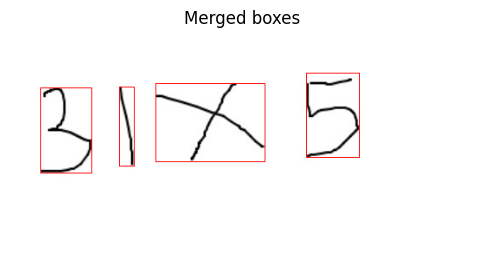

Total boxes (before filtering): 4
Boxes after filter (min_area_thresh=116): 4


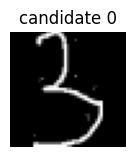

Orig top3: [('3', 0.17293760180473328), ('times', 0.0636201873421669), ('9', 0.0636201873421669)]
Inv  top3: [('8', 0.17270967364311218), ('+', 0.06372473388910294), ('4', 0.06363049149513245)]
Chosen (orig): 3 



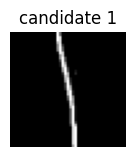

Orig top3: [('1', 0.17293760180473328), ('times', 0.0636201873421669), ('9', 0.0636201873421669)]
Inv  top3: [('8', 0.1725674867630005), ('+', 0.0637892559170723), ('4', 0.06363768875598907)]
Chosen (orig): 1 



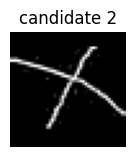

Orig top3: [('times', 0.12261521071195602), ('+', 0.09434299170970917), ('8', 0.06527604162693024)]
Inv  top3: [('8', 0.110458604991436), ('+', 0.10514774173498154), ('4', 0.065366230905056)]
Chosen (orig): times 



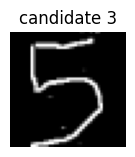

Orig top3: [('5', 0.17293760180473328), ('times', 0.0636201873421669), ('9', 0.0636201873421669)]
Inv  top3: [('8', 0.17264136672019958), ('+', 0.06375593692064285), ('4', 0.06363371759653091)]
Chosen (orig): 5 

🔎 Final predicted equation: 31*5
✅ Solved: 31*5 = 155


In [ ]:
import os, cv2, numpy as np, matplotlib.pyplot as plt, tensorflow as tf
import re
# --- helper funcs ---------------------------------------------------------
def getOverlap(a, b):
    return max(0, min(a[1], b[1]) - max(a[0], b[0]))

def detect_contours_merge(img_gray):
    """Adaptive threshold + invert + find contours + merge overlapping boxes (original notebook logic)."""
    binarized = cv2.adaptiveThreshold(img_gray, 255,
                                      cv2.ADAPTIVE_THRESH_MEAN_C,
                                      cv2.THRESH_BINARY, 11, 2)
    inverted = ~binarized
    contours, _ = cv2.findContours(inverted, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    l = []
    for c in contours:
        x, y, w, h = cv2.boundingRect(c)
        l.append([x, y, w, h])
    # merge overlapping boxes
    lcopy = l.copy()
    keep = []
    while lcopy:
        curr_x, curr_y, curr_w, curr_h = lcopy.pop(0)
        if curr_w * curr_h < 20:  # tiny -> drop
            continue
        throw = []
        for i, (x, y, w, h) in enumerate(lcopy):
            curr_interval = [curr_x, curr_x + curr_w]
            next_interval = [x, x + w]
            if getOverlap(curr_interval, next_interval) > 1:
                # merge
                new_interval_x = [min(curr_x, x), max(curr_x + curr_w, x + w)]
                new_interval_y = [min(curr_y, y), max(curr_y + curr_h, y + h)]
                curr_x, curr_y = new_interval_x[0], new_interval_y[0]
                curr_w, curr_h = new_interval_x[1] - new_interval_x[0], new_interval_y[1] - new_interval_y[0]
                throw.append(i)
        for ind in sorted(throw, reverse=True):
            lcopy.pop(ind)
        keep.append([curr_x, curr_y, curr_w, curr_h])
    return inverted, keep

def resize_pad(img, size=(45,45), pad_value=0):
    h, w = img.shape[:2]
    if h == 0 or w == 0:
        return None
    sh, sw = size
    interp = cv2.INTER_AREA if (h > sh or w > sw) else cv2.INTER_CUBIC
    aspect = w / h
    if aspect > 1:
        new_w = sw
        new_h = int(round(new_w / aspect))
        pad_top = (sh - new_h) // 2
        pad_bot = sh - new_h - pad_top
        pad_left = pad_right = 0
    elif aspect < 1:
        new_h = sh
        new_w = int(round(new_h * aspect))
        pad_left = (sw - new_w) // 2
        pad_right = sw - new_w - pad_left
        pad_top = pad_bot = 0
    else:
        new_h, new_w = sh, sw
        pad_left = pad_right = pad_top = pad_bot = 0
    scaled = cv2.resize(img, (new_w, new_h), interpolation=interp)
    result = np.full((sh, sw), pad_value, dtype=np.uint8)
    result[pad_top:pad_top+new_h, pad_left:pad_left+new_w] = scaled
    return result

# --- load model -----------------------------------------------------------
model = None
tried_paths = [
    "/content/drive/MyDrive/EQUATION_model/my_model.h5",
    "/content/my_model.h5",
    "/content/drive/MyDrive/EQUATION_model/eqn-detect-model",
    "/content/eqn-detect-model"
]
for p in tried_paths:
    try:
        model = tf.keras.models.load_model(p)
        print("✅ Loaded model from:", p)
        break
    except Exception:
        pass
if model is None:
    raise FileNotFoundError(f"Model not found. Tried: {tried_paths}")

class_names = ['+', '-', '0','1','2','3','4','5','6','7','8','9','=','times']

# --- run detection --------------------------------------------------------
IMAGE = "/content/test2.jpg"   # change if needed
img_path = os.path.join("equation_images", IMAGE)
if not os.path.exists(img_path):
    raise FileNotFoundError("Equation image not found at: " + img_path)

img_gray = cv2.imread(img_path, 0)
inverted, boxes = detect_contours_merge(img_gray)

# visualize merged boxes
img_vis = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)
for (x,y,w,h) in boxes:
    cv2.rectangle(img_vis, (x,y), (x+w, y+h), (0,0,255), 1)
plt.figure(figsize=(6,6))
plt.imshow(img_vis[:,:,::-1])
plt.title("Merged boxes")
plt.axis('off')
plt.show()
print("Total boxes (before filtering):", len(boxes))

# filter tiny / noise boxes
areas = [w*h for x,y,w,h in boxes] if boxes else [0]
median_area = np.median(areas) if areas else 0
min_area_thresh = max(80, median_area * 0.02)
filtered = [b for b in boxes if (b[2] > 3 and b[3] > 3 and (b[2]*b[3]) >= min_area_thresh)]
print("Boxes after filter (min_area_thresh={}):".format(int(min_area_thresh)), len(filtered))

# sort left→right
filtered = sorted(filtered, key=lambda b: b[0])

# --- predict --------------------------------------------------------------
eqn_list = []
for i, (x,y,w,h) in enumerate(filtered):
    roi = inverted[y:y+h, x:x+w]
    if roi is None or roi.size == 0:
        print(f"⚠️ Skipping candidate {i} (empty ROI)")
        continue

    proc = resize_pad(roi, (45,45), pad_value=0)
    if proc is None:
        print(f"⚠️ Skipping candidate {i} (resize failed)")
        continue

    plt.figure(figsize=(1.5,1.5))
    plt.imshow(proc, cmap='gray')
    plt.title(f"candidate {i}")
    plt.axis('off')
    plt.show()

    inp = tf.expand_dims(tf.expand_dims(proc, 0), -1)
    logits = model.predict(inp, verbose=0)
    probs = tf.nn.softmax(logits[0]).numpy()
    top_idx = probs.argmax()
    top3 = probs.argsort()[-3:][::-1]
    print("Orig top3:", [(class_names[idx], float(probs[idx])) for idx in top3])

    proc_inv = 255 - proc
    inp2 = tf.expand_dims(tf.expand_dims(proc_inv, 0), -1)
    logits2 = model.predict(inp2, verbose=0)
    probs2 = tf.nn.softmax(logits2[0]).numpy()
    top_idx2 = probs2.argmax()
    top3_inv = probs2.argsort()[-3:][::-1]
    print("Inv  top3:", [(class_names[idx], float(probs2[idx])) for idx in top3_inv])

    if probs2[top_idx2] > probs[top_idx] + 0.08:
        chosen = class_names[top_idx2]; source = "inv"
    else:
        chosen = class_names[top_idx]; source = "orig"
    print(f"Chosen ({source}):", chosen, "\n")
    chosen = "*" if chosen == "times" else chosen
    eqn_list.append(chosen)

final_eq = "".join(eqn_list)
print("🔎 Final predicted equation:", final_eq)

# --- clean the equation for solving ---
expr = final_eq.replace("times", "*").replace("×", "*")
expr = expr.replace("=", "")   # remove '=' if it's just a marker
expr = expr.replace(" ", "")

# allow only safe characters (digits + operators)
if re.fullmatch(r"[0-9+\-*/().]+", expr):
    try:
        result = eval(expr, {"__builtins__": None}, {})
        print("✅ Solved:", expr, "=", result)
    except Exception as e:
        print("⚠️ Could not solve equation:", e)
else:
    print("⚠️ Equation contains unsupported characters, not solving.")


✅ Loaded model from: /content/drive/MyDrive/EQUATION_model/my_model.h5


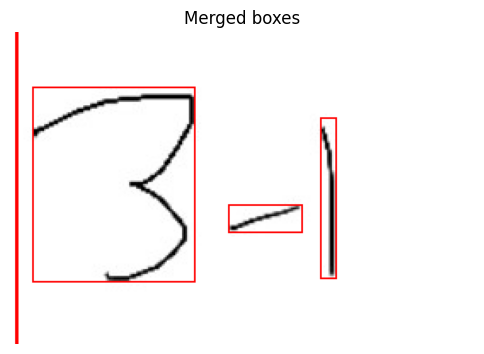

Total boxes (before filtering): 4
Boxes after filter (min_area_thresh=80): 3


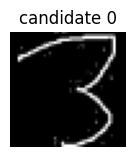

Orig top3: [('3', 0.17293760180473328), ('times', 0.0636201873421669), ('9', 0.0636201873421669)]
Inv  top3: [('8', 0.16698327660560608), ('+', 0.06627421081066132), ('4', 0.06403560936450958)]
Chosen (orig): 3 



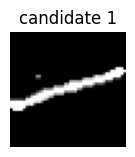

Orig top3: [('-', 0.17293748259544373), ('=', 0.06362023949623108), ('9', 0.0636201947927475)]
Inv  top3: [('+', 0.172467902302742), ('4', 0.06383591890335083), ('9', 0.06364135444164276)]
Chosen (orig): - 



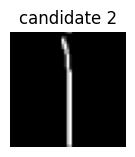

Orig top3: [('1', 0.17293423414230347), ('+', 0.063621386885643), ('-', 0.06362063437700272)]
Inv  top3: [('8', 0.1727624535560608), ('+', 0.06368222087621689), ('4', 0.0636463612318039)]
Chosen (orig): 1 

🔎 Final predicted equation: 3-1
✅ Solved: 3-1 = 2


In [ ]:
import os, cv2, numpy as np, matplotlib.pyplot as plt, tensorflow as tf
import re
# --- helper funcs ---------------------------------------------------------
def getOverlap(a, b):
    return max(0, min(a[1], b[1]) - max(a[0], b[0]))

def detect_contours_merge(img_gray):
    """Adaptive threshold + invert + find contours + merge overlapping boxes (original notebook logic)."""
    binarized = cv2.adaptiveThreshold(img_gray, 255,
                                      cv2.ADAPTIVE_THRESH_MEAN_C,
                                      cv2.THRESH_BINARY, 11, 2)
    inverted = ~binarized
    contours, _ = cv2.findContours(inverted, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    l = []
    for c in contours:
        x, y, w, h = cv2.boundingRect(c)
        l.append([x, y, w, h])
    # merge overlapping boxes
    lcopy = l.copy()
    keep = []
    while lcopy:
        curr_x, curr_y, curr_w, curr_h = lcopy.pop(0)
        if curr_w * curr_h < 20:  # tiny -> drop
            continue
        throw = []
        for i, (x, y, w, h) in enumerate(lcopy):
            curr_interval = [curr_x, curr_x + curr_w]
            next_interval = [x, x + w]
            if getOverlap(curr_interval, next_interval) > 1:
                # merge
                new_interval_x = [min(curr_x, x), max(curr_x + curr_w, x + w)]
                new_interval_y = [min(curr_y, y), max(curr_y + curr_h, y + h)]
                curr_x, curr_y = new_interval_x[0], new_interval_y[0]
                curr_w, curr_h = new_interval_x[1] - new_interval_x[0], new_interval_y[1] - new_interval_y[0]
                throw.append(i)
        for ind in sorted(throw, reverse=True):
            lcopy.pop(ind)
        keep.append([curr_x, curr_y, curr_w, curr_h])
    return inverted, keep

def resize_pad(img, size=(45,45), pad_value=0):
    h, w = img.shape[:2]
    if h == 0 or w == 0:
        return None
    sh, sw = size
    interp = cv2.INTER_AREA if (h > sh or w > sw) else cv2.INTER_CUBIC
    aspect = w / h
    if aspect > 1:
        new_w = sw
        new_h = int(round(new_w / aspect))
        pad_top = (sh - new_h) // 2
        pad_bot = sh - new_h - pad_top
        pad_left = pad_right = 0
    elif aspect < 1:
        new_h = sh
        new_w = int(round(new_h * aspect))
        pad_left = (sw - new_w) // 2
        pad_right = sw - new_w - pad_left
        pad_top = pad_bot = 0
    else:
        new_h, new_w = sh, sw
        pad_left = pad_right = pad_top = pad_bot = 0
    scaled = cv2.resize(img, (new_w, new_h), interpolation=interp)
    result = np.full((sh, sw), pad_value, dtype=np.uint8)
    result[pad_top:pad_top+new_h, pad_left:pad_left+new_w] = scaled
    return result

# --- load model -----------------------------------------------------------
model = None
tried_paths = [
    "/content/drive/MyDrive/EQUATION_model/my_model.h5",
    "/content/my_model.h5",
    "/content/drive/MyDrive/EQUATION_model/eqn-detect-model",
    "/content/eqn-detect-model"
]
for p in tried_paths:
    try:
        model = tf.keras.models.load_model(p)
        print("✅ Loaded model from:", p)
        break
    except Exception:
        pass
if model is None:
    raise FileNotFoundError(f"Model not found. Tried: {tried_paths}")

class_names = ['+', '-', '0','1','2','3','4','5','6','7','8','9','=','times']

# --- run detection --------------------------------------------------------
IMAGE = "/content/test4.jpg"   # change if needed
img_path = os.path.join("equation_images", IMAGE)
if not os.path.exists(img_path):
    raise FileNotFoundError("Equation image not found at: " + img_path)

img_gray = cv2.imread(img_path, 0)
inverted, boxes = detect_contours_merge(img_gray)

# visualize merged boxes
img_vis = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)
for (x,y,w,h) in boxes:
    cv2.rectangle(img_vis, (x,y), (x+w, y+h), (0,0,255), 1)
plt.figure(figsize=(6,6))
plt.imshow(img_vis[:,:,::-1])
plt.title("Merged boxes")
plt.axis('off')
plt.show()
print("Total boxes (before filtering):", len(boxes))

# filter tiny / noise boxes
areas = [w*h for x,y,w,h in boxes] if boxes else [0]
median_area = np.median(areas) if areas else 0
min_area_thresh = max(80, median_area * 0.02)
filtered = [b for b in boxes if (b[2] > 3 and b[3] > 3 and (b[2]*b[3]) >= min_area_thresh)]
print("Boxes after filter (min_area_thresh={}):".format(int(min_area_thresh)), len(filtered))

# sort left→right
filtered = sorted(filtered, key=lambda b: b[0])

# --- predict --------------------------------------------------------------
eqn_list = []
for i, (x,y,w,h) in enumerate(filtered):
    roi = inverted[y:y+h, x:x+w]
    if roi is None or roi.size == 0:
        print(f"⚠️ Skipping candidate {i} (empty ROI)")
        continue

    proc = resize_pad(roi, (45,45), pad_value=0)
    if proc is None:
        print(f"⚠️ Skipping candidate {i} (resize failed)")
        continue

    plt.figure(figsize=(1.5,1.5))
    plt.imshow(proc, cmap='gray')
    plt.title(f"candidate {i}")
    plt.axis('off')
    plt.show()

    inp = tf.expand_dims(tf.expand_dims(proc, 0), -1)
    logits = model.predict(inp, verbose=0)
    probs = tf.nn.softmax(logits[0]).numpy()
    top_idx = probs.argmax()
    top3 = probs.argsort()[-3:][::-1]
    print("Orig top3:", [(class_names[idx], float(probs[idx])) for idx in top3])

    proc_inv = 255 - proc
    inp2 = tf.expand_dims(tf.expand_dims(proc_inv, 0), -1)
    logits2 = model.predict(inp2, verbose=0)
    probs2 = tf.nn.softmax(logits2[0]).numpy()
    top_idx2 = probs2.argmax()
    top3_inv = probs2.argsort()[-3:][::-1]
    print("Inv  top3:", [(class_names[idx], float(probs2[idx])) for idx in top3_inv])

    if probs2[top_idx2] > probs[top_idx] + 0.08:
        chosen = class_names[top_idx2]; source = "inv"
    else:
        chosen = class_names[top_idx]; source = "orig"
    print(f"Chosen ({source}):", chosen, "\n")
    chosen = "*" if chosen == "times" else chosen
    eqn_list.append(chosen)

final_eq = "".join(eqn_list)
print("🔎 Final predicted equation:", final_eq)

# --- clean the equation for solving ---
expr = final_eq.replace("times", "*").replace("×", "*")
expr = expr.replace("=", "")   # remove '=' if it's just a marker
expr = expr.replace(" ", "")

# allow only safe characters (digits + operators)
if re.fullmatch(r"[0-9+\-*/().]+", expr):
    try:
        result = eval(expr, {"__builtins__": None}, {})
        print("✅ Solved:", expr, "=", result)
    except Exception as e:
        print("⚠️ Could not solve equation:", e)
else:
    print("⚠️ Equation contains unsupported characters, not solving.")


In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model("my_model.h5")
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 45, 45, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 43, 43, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 21, 21, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 19, 19, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 9, 9, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 14)             │         1,806 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,616 (225.07 KB)

 Trainable params: 57,614 (225.05 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)